# Linear Model Selection and Regularization

In [1]:

library(ISLR)
# names(Hitters)
dim(Hitters) #322 rows, 20 columns
sum(is.na(Hitters)) # 59 rows with NA values in one of the colummns
sum(is.na(Hitters$Salary))
summary(Hitters)

Warning message:
"package 'ISLR' was built under R version 3.4.2"

[1] 322  20

[1] 59

[1] 59

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

In [2]:
fix(Hitters)
attach(Hitters)

In [4]:
Hitters=na.omit(Hitters) #remove rows with NA values
dim(Hitters) #dimensions after removing the NA rows
sum(is.na(Hitters))
summary(Hitters)

[1] 263  20

[1] 0

     AtBat            Hits           HmRun            Runs       
 Min.   : 19.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:282.5   1st Qu.: 71.5   1st Qu.: 5.00   1st Qu.: 33.50  
 Median :413.0   Median :103.0   Median : 9.00   Median : 52.00  
 Mean   :403.6   Mean   :107.8   Mean   :11.62   Mean   : 54.75  
 3rd Qu.:526.0   3rd Qu.:141.5   3rd Qu.:18.00   3rd Qu.: 73.00  
 Max.   :687.0   Max.   :238.0   Max.   :40.00   Max.   :130.00  
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 30.00   1st Qu.: 23.00   1st Qu.: 4.000   1st Qu.:  842.5  
 Median : 47.00   Median : 37.00   Median : 6.000   Median : 1931.0  
 Mean   : 51.49   Mean   : 41.11   Mean   : 7.312   Mean   : 2657.5  
 3rd Qu.: 71.00   3rd Qu.: 57.00   3rd Qu.:10.000   3rd Qu.: 3890.5  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0  
     CHits            CHmRun           CRuns    

regsubsets() function (part of the leaps library) performs best subset selection by identifying the best model that contains a given number of predictors, where best is quantified using RSS. The syntax is the same as for lm(). The summary() command outputs the best set of variables for each model size.

## Best Subset Selection 

In [6]:
library(leaps)

In [7]:
#taking all input variables to predict salary using Best Subset selection model
regit.full=regsubsets(Salary~.,Hitters)
summary(regit.full) #outputs the best set of variables for each model size
# An asterisk indicates that a given variable is included in the corresponding model.

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

In [8]:
#taking all input variables to predict salary using Best Subset selection model
regit.full=regsubsets(Salary~.,Hitters,nvmax=19) #nvmax shows all models upto 19 predictors
reg.summary=summary(regit.full) #outputs the best set of variables for each model size
# An asterisk indicates that a given variable is included in the corresponding model.

In [11]:
# The summary() function also returns R2, RSS, adjusted R2, Cp, and BIC.
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [13]:
round(reg.summary$rsq,3)
#R2 statistic increases monotonically as more variables are included

[1] 0.321 0.425 0.451 0.475 0.491 0.509 0.514 0.529 0.535 0.540 0.543 0.544
[13] 0.544 0.545 0.545 0.546 0.546 0.546 0.546

[1] "Adjusted RSQ is maximum at"


[1] 11

[1] "Cp is minimum at"


[1] 10

[1] "BIC is minimum at"


[1] 6

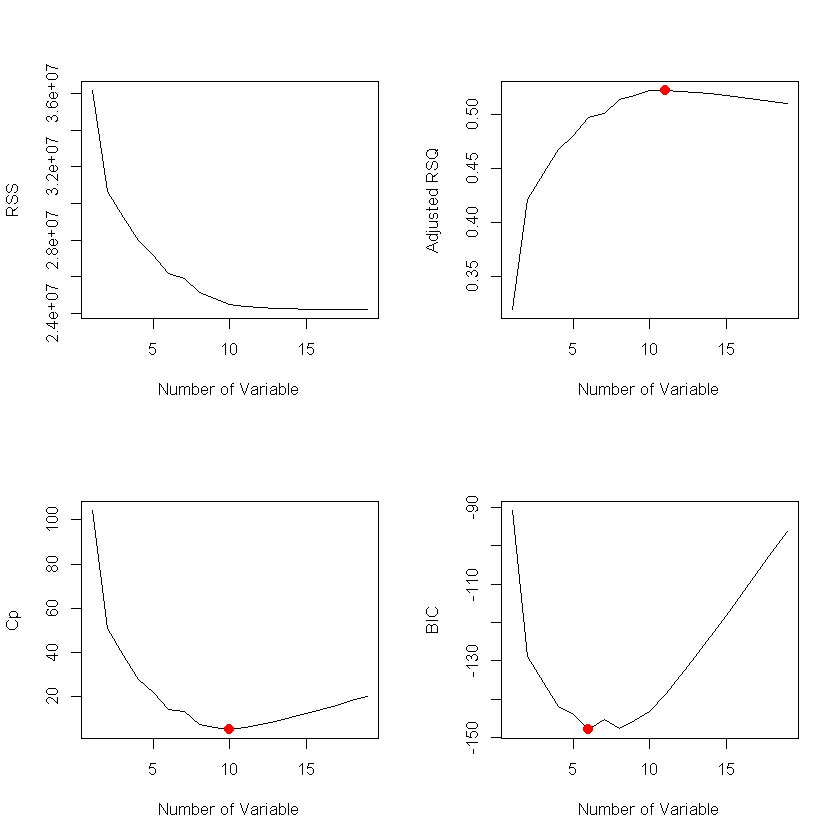

In [26]:
par(mfrow=c(2,2))
plot(reg.summary$rss,xlab="Number of Variable", ylab="RSS", type="l")

# Adjusted R-square plot and the point at which it is maximum
plot(reg.summary$adjr2,xlab="Number of Variable", ylab="Adjusted RSQ", type="l")
adjr2max=which.max(reg.summary$adjr2)
print("Adjusted RSQ is maximum at")
adjr2max
points(adjr2max, reg.summary$adjr2[adjr2max],col="red", cex=2, pch=20)


# Cp plot and the point at which it is minimum
plot(reg.summary$cp,xlab="Number of Variable", ylab="Cp", type="l")
cpmin=which.min(reg.summary$cp)
print("Cp is minimum at")
cpmin
points(cpmin, reg.summary$cp[cpmin],col="red", cex=2, pch=20)


# BIC plot and the point at which it is minimum
plot(reg.summary$bic,xlab="Number of Variable", ylab="BIC", type="l")
bicmin=which.min(reg.summary$bic)
print("BIC is minimum at")
bicmin
points(bicmin, reg.summary$bic[bicmin],col="red", cex=2, pch=20)



The regsubsets() function has a built-in plot() command which can
be used to display the selected variables for the best model with a given
number of predictors, ranked according to the BIC, Cp, adjusted R2, or
AIC

The top row of each plot contains a black square for each variable selected
according to the optimal model associated with that statistic.

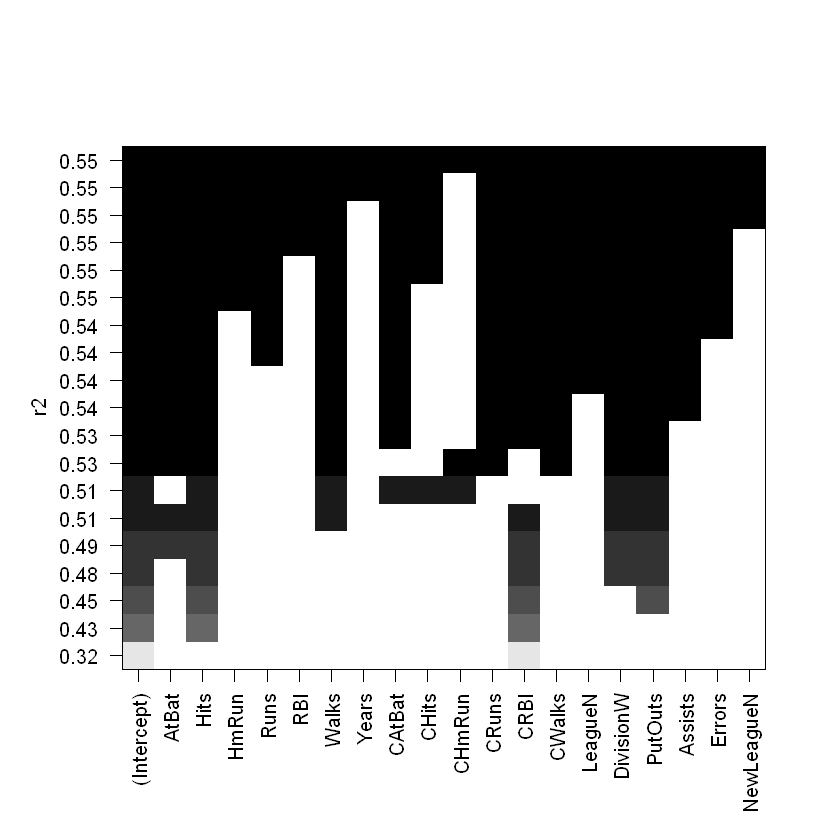

In [27]:
plot(regit.full, scale="r2")

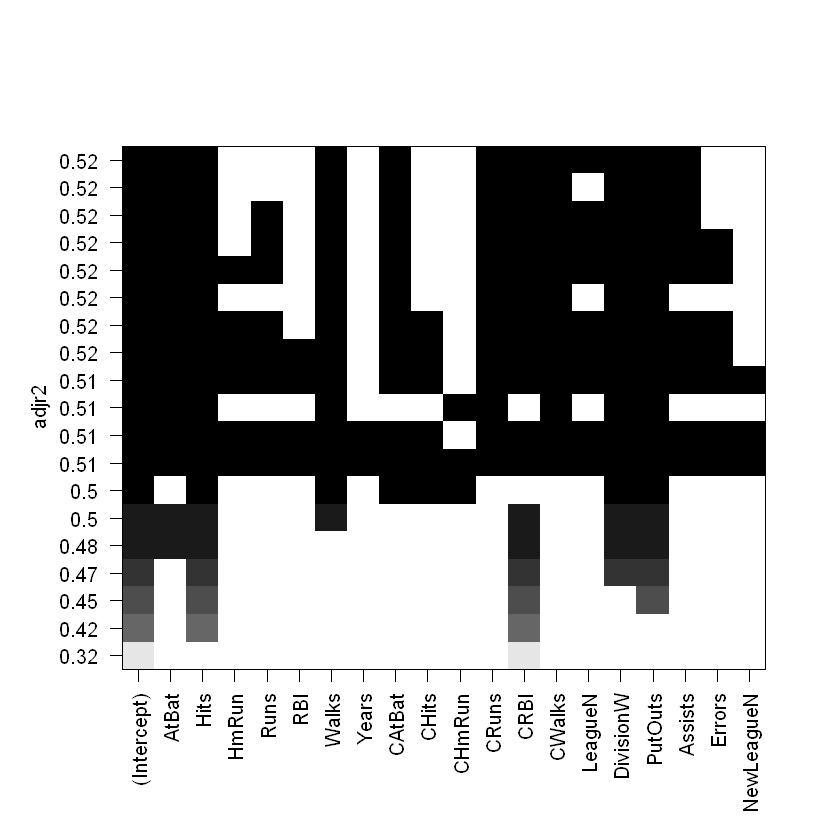

In [28]:
plot(regit.full, scale="adjr2")

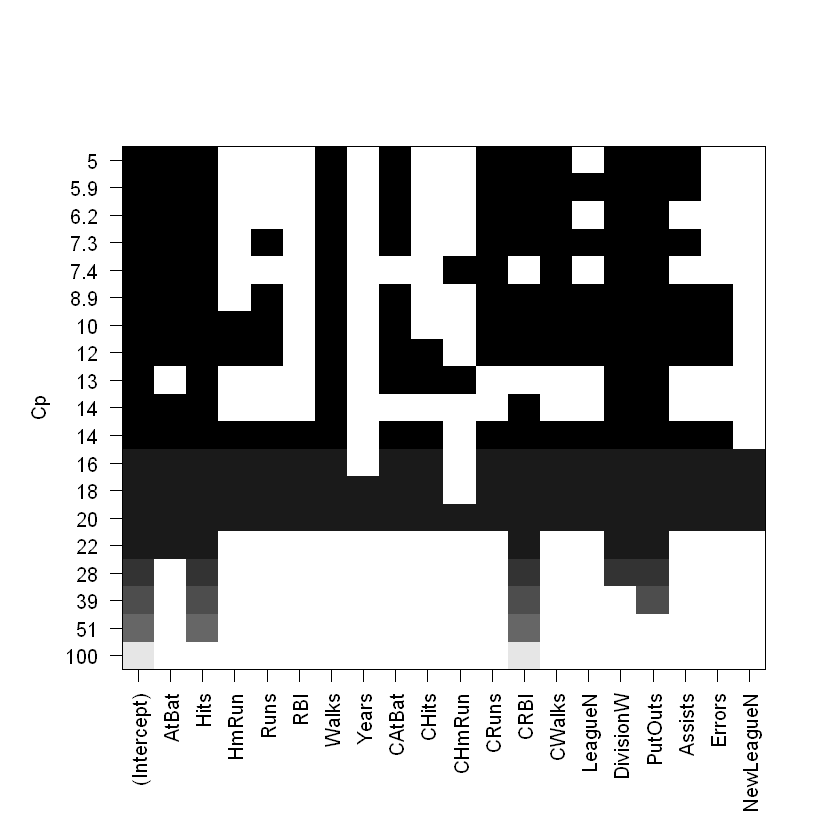

In [30]:
plot(regit.full, scale="Cp")

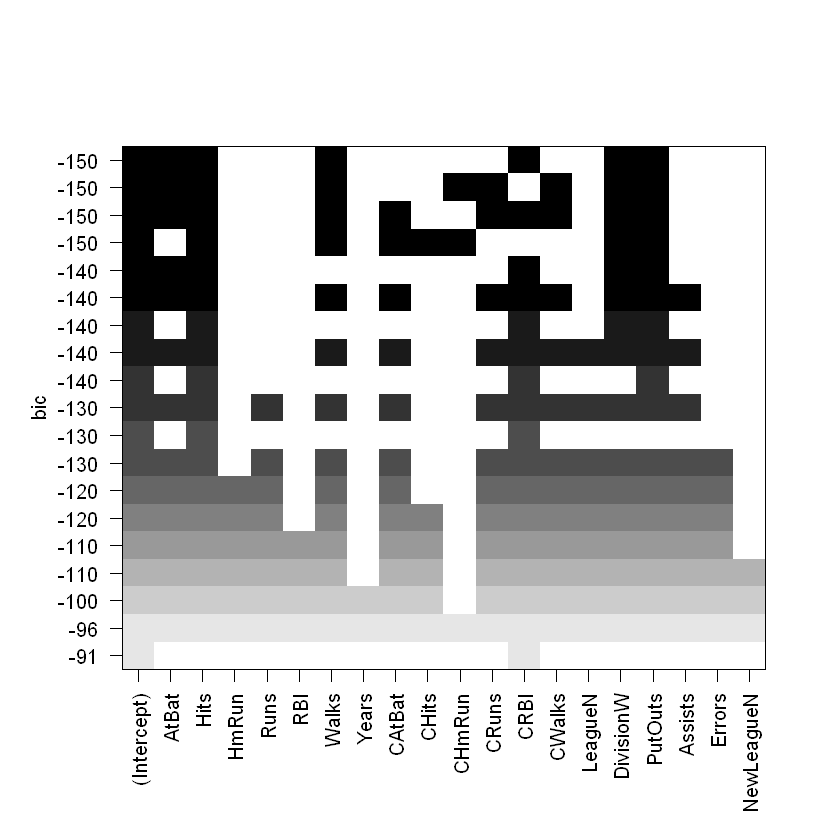

In [31]:
plot(regit.full, scale="bic")
# model with lowest BIC is 6 variable model which includes variables- AtBat, Hits,Walks, CRBI,DivisionW, PutOuts

In [33]:
# coef() function can be to used see the coefficient estimates associated with this model
round(coef(regit.full ,6),2)

(Intercept)       AtBat        Hits       Walks        CRBI   DivisionW 
      91.51       -1.87        7.60        3.70        0.64     -122.95 
    PutOuts 
       0.26

## Forward and Backward Stepwise Selection

In [6]:
library(leaps)
regfit.fwd=regsubsets(Salary~.,data=Hitters, method='forward', nvmax=19)
summary(regfit.fwd)

Warning message:
"package 'leaps' was built under R version 3.4.2"

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, method = "forward", 
    nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*

In [7]:
# Backward stepwise selection
regfit.bwd=regsubsets(Salary~.,data=Hitters, method='backward', nvmax=19)
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, method = "backward", 
    nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   

In [9]:
coef(regit.full,7)
coef(regfit.fwd,7)
coef(regfit.bwd,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

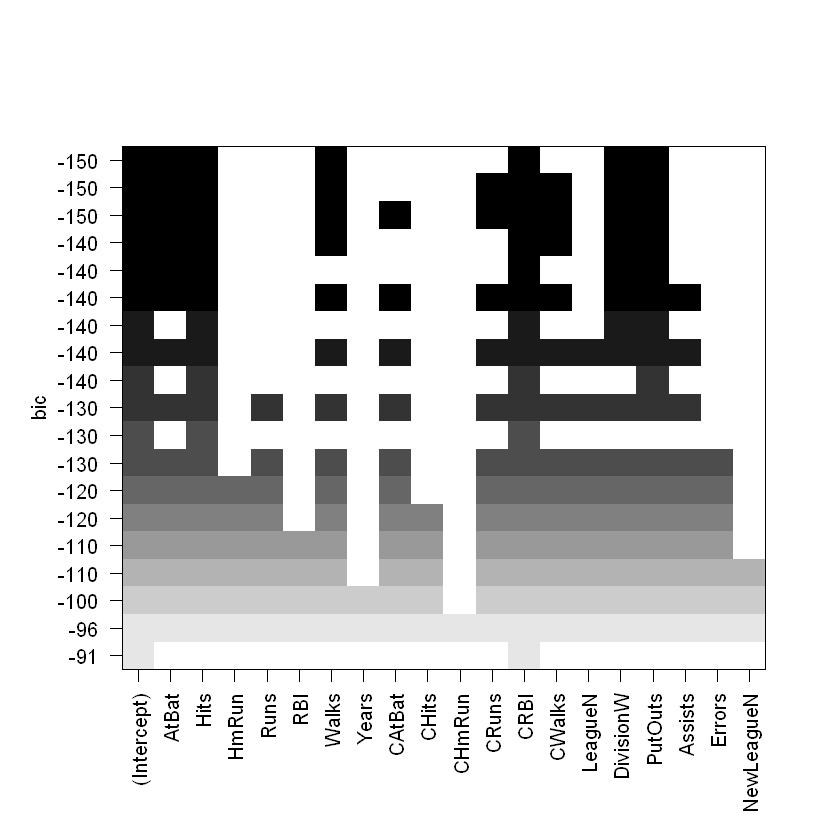

In [10]:
plot(regfit.fwd,scale="bic")

## 6.5.3 Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [11]:
set.seed(1)

In [13]:
train=sample(c(TRUE,FALSE),nrow(Hitters),rep=TRUE)
test=!train

In [14]:
regfit.best=regsubsets(Salary~.,data=Hitters, subset=train, nvmax=19)

In [15]:
summary(regfit.best)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, subset = train, 
    nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   "*"  " "   " "  " " " "   " "   " "    " "   " "    " "   " "

In [16]:
test.mat=model.matrix(Salary~.,data=Hitters[test,])

In [18]:
  coefi=coef(regfit.best,2)
coefi

(Intercept)         Hits        CHits 
-188.8587357    4.6645981    0.2860123

In [19]:
#storing validation error for each model with 1 to 19 variables
val.errors=rep(NA,19)
for(i in 1:19) {
    coefi=coef(regfit.best,i)
    pred=test.mat[,names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}

In [20]:
val.errors

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

In [21]:
which.min(val.errors)
# shows the validation error is least for 10 variable model

[1] 10

In [22]:
coef(regfit.best,10)

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

## write our own predict method.

In [29]:
predict.regsubsets=function(object,newdata,id,...) {
    form=as.formula(object$call[[2]])
    mat=model.matrix(form, newdata)
    coefi=coef(object,id=id)
    xvars=names(coefi)
    mat[,xvars]%*%coefi
}

Finally, we perform best subset selection on the full data set, and select
the best ten-variable model

In [23]:
regfit.best=regsubsets(Salary~.,data=Hitters, nvmax=19)

In [24]:
coef(regfit.best,10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

In [25]:
k=10
set.seed(1)
folds=sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors=matrix(NA,k,19,dimnames=list(NULL,paste(1:19)))

In [30]:
for (j in 1:k){
    best.fit = regsubsets ( Salary∼., data= Hitters [ folds !=j ,], nvmax =19)
    for (i in 1:19) {
        pred= predict.regsubsets(best.fit , Hitters [ folds ==j,], id=i)
        cv.errors [j,i]= mean( ( Hitters$Salary[ folds ==j]-pred)^2)
    }
}

In [31]:
mean.cv.errors = apply(cv.errors ,2, mean)
mean.cv.errors


1        2        3        4        5        6        7        8 
160093.5 140196.8 153117.0 151159.3 146841.3 138302.6 144346.2 130207.7 
       9       10       11       12       13       14       15       16 
129459.6 125334.7 125153.8 128273.5 133461.0 133974.6 131825.7 131882.8 
      17       18       19 
132750.9 133096.2 132804.7

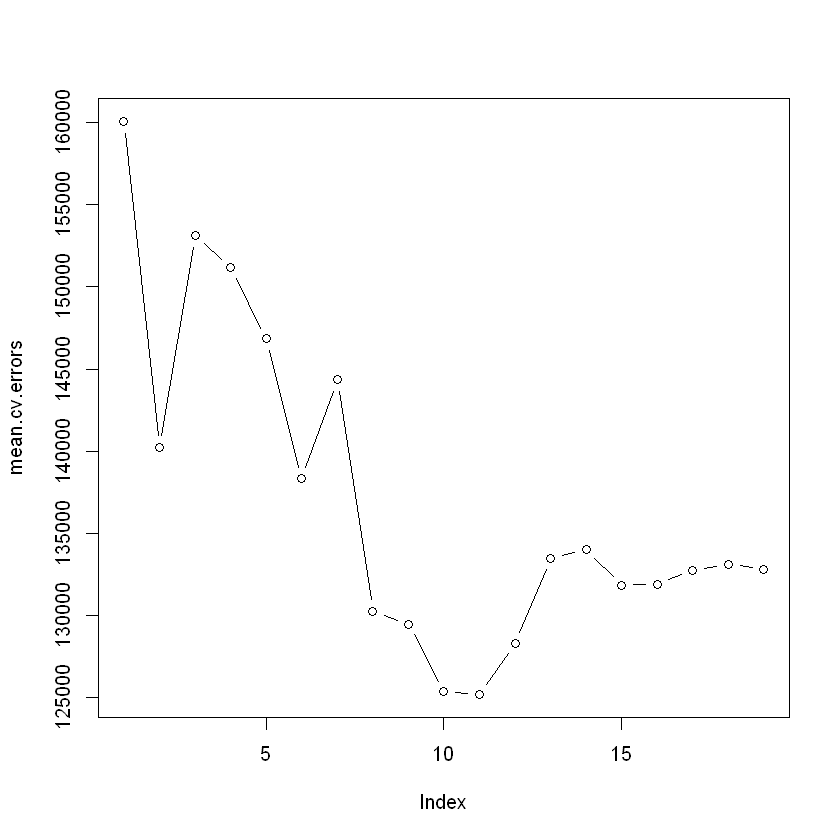

In [33]:
par(mfrow =c(1 ,1) )
plot(mean.cv.errors ,type ='b')

We see that cross-validation selects an 11-variable model. We now perform
best subset selection on the full data set in order to obtain the 11-variable
model.

In [34]:
reg.best= regsubsets ( Salary∼., data=Hitters , nvmax =19)
coef(reg.best ,11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

In [3]:
# glmnet pakage for ridge and lasso
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.4.2"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.4.2"Loaded glmnet 2.0-13



In [4]:
x=model.matrix(Salary~.,Hitters)[,-1]
y=Hitters$Salary

In [12]:
#Rideg regression
# grid of values ranging from λ = 10^10 to λ = 10^−2
grid=10^seq(10,-2,length=100)
# alpha=0 -> ridge regression model , alpha=1 -> lasso model
ridge.mod=glmnet(x,y,alpha=0,lambda=grid)
#default is ridge regression in glmnet function, standardised variables is also default
dim(coef(ridge.mod))


[1]  20 100

In [13]:
names(ridge.mod)
ridge.mod$lambda[50]
coef(ridge.mod)[,50]
sqrt(sum(coef( ridge.mod )[-1,50]^2))


[1] "a0"        "beta"      "df"        "dim"       "lambda"    "dev.ratio"
 [7] "nulldev"   "npasses"   "jerr"      "offset"    "call"      "nobs"

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

In [16]:
ridge.mod$lambda [60]
coef(ridge.mod)[ ,60]
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

[1] 57.11001

In [17]:
predict(ridge.mod,s=50,type="coefficients")[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

In [18]:
set.seed(1)
train=sample(1:nrow(x),nrow(x)/2)
test=-train
y.test=y[test]

In [29]:
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod, s=4, newx=x[test,])
mean((ridge.pred-y.test)^2) #MSE
mean((mean(y[train])-y.test)^2)
ridge.pred= predict(ridge.mod ,s=1e10 , newx=x[test,]) #taking very large value of lambda
mean((ridge.pred-y.test)^2)
#  least squares is simply ridge regression with λ = 0.
ridge.pred= predict(ridge.mod ,s=0 , newx=x[test,]) #taking very large value of lambda
mean((ridge.pred-y.test)^2)
library(ISLR)
library (MASS)
lm(y∼x, subset=train )
predict(ridge.mod,s=0, exact=T, type ="coefficients")[1:20,]

[1] 101036.8

[1] 193253.1

[1] 193253.1

[1] 114723.6


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
  299.42849     -2.54027      8.36682     11.64512     -9.09923      2.44105  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
    9.23440    -22.93673     -0.18154     -0.11598     -1.33888      3.32838  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    0.07536     -1.07841     59.76065    -98.86233      0.34087      0.34165  
    xErrors  xNewLeagueN  
   -0.64207     -0.67442  


ERROR: Error: used coef.glmnet() or predict.glmnet() with `exact=TRUE` so must in addition supply original argument(s)  x and y  in order to safely rerun glmnet


[1] 211.7416

[1] 96015.51

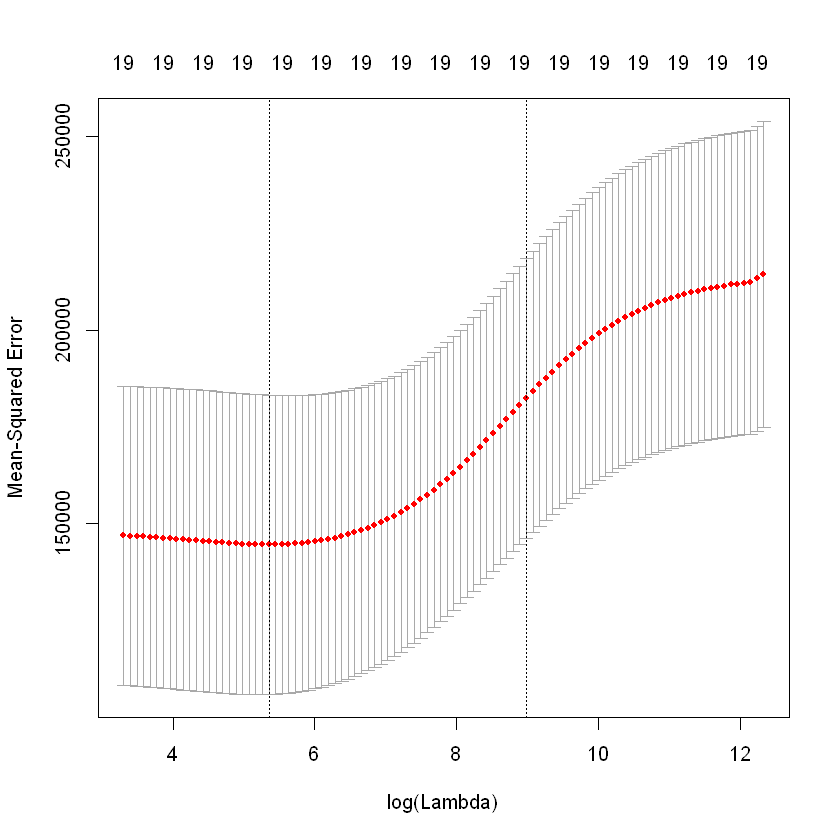

In [32]:
set.seed (1)
cv.out =cv.glmnet(x[train ,], y[train ], alpha =0)
plot(cv.out )
bestlam =cv.out$lambda.min
bestlam
ridge.pred= predict (ridge.mod ,s=bestlam , newx=x[test ,])
mean((ridge.pred-y.test)^2)

In [35]:
# refit our ridge regression model on the full data set,
# using the value of λ chosen by cross-validation, 
out=glmnet(x,y, alpha =0)
predict(out,type ="coefficients",s= bestlam )[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074381   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227535 -91.63411299   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208390

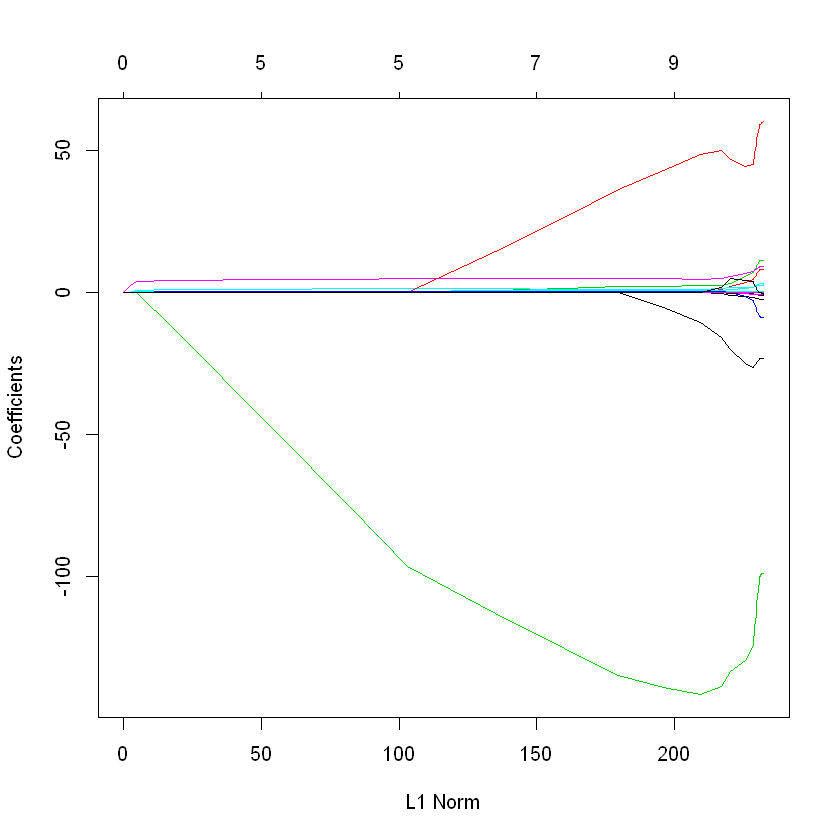

[1] 16.78016

[1] 100743.4

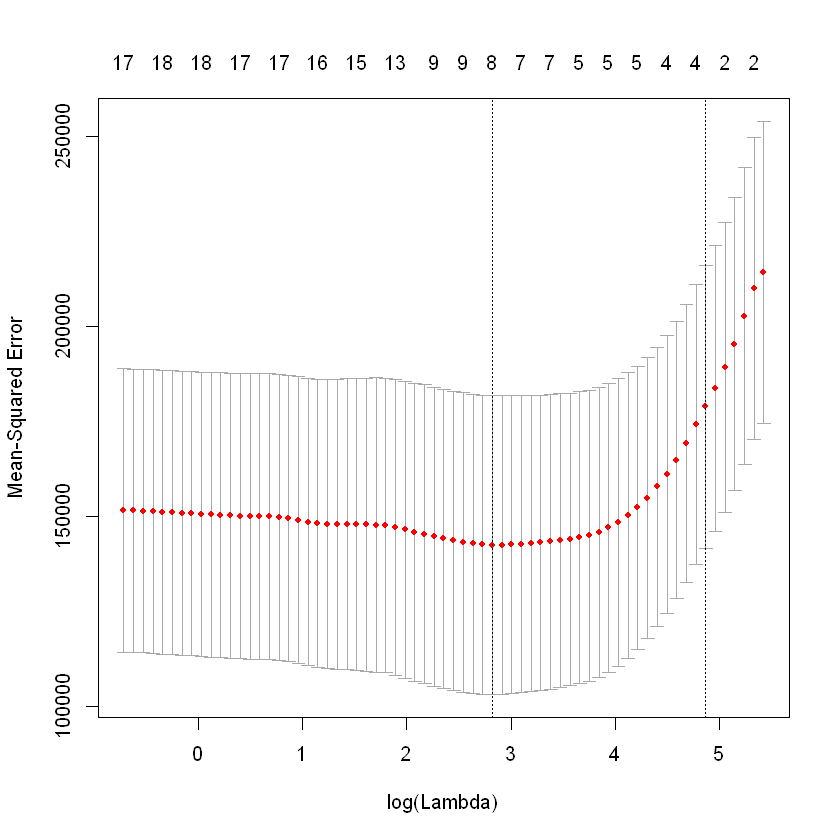

In [37]:
#Lasso
lasso.mod=glmnet(x[train,], y[train],alpha=1, lambda=grid)
plot(lasso.mod) #coefficient plot
# cross-validation and compute the associated test error.
set.seed (1)
cv.out =cv.glmnet(x[train ,], y[train ], alpha =1)
plot(cv.out )
bestlam =cv.out$lambda.min
bestlam
lasso.pred= predict (lasso.mod ,s=bestlam , newx=x[test ,])
mean((lasso.pred-y.test)^2)

In [39]:
# refit our lasso regression model on the full data set,
# using the value of λ chosen by cross-validation, 
out=glmnet(x,y, alpha =1,lambda=grid)
lasso.coef=predict(out,type ="coefficients",s= bestlam )[1:20,]
lasso.coef
lasso.coef[lasso.coef!=0]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  18.5394844    0.0000000    1.8735390    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2178444    0.0000000    0.0000000    0.0000000    0.0000000    0.2071252 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4130132    0.0000000    3.2666677 -103.4845458    0.2204284    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

(Intercept)         Hits        Walks        CRuns         CRBI      LeagueN 
  18.5394844    1.8735390    2.2178444    0.2071252    0.4130132    3.2666677 
   DivisionW      PutOuts 
-103.4845458    0.2204284